# Part 1: Mini Project - Movie Database Analysis
## UCSanDiegoX: DSE200x: Python for Data Science

Please note that **you will need to download the dataset**. 

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 



## Data Import

The following section imports the three datasets needed as well as displays the count of records in each database as well as the head (first few rows) of each for a quick view into the data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('../../datasets/movielens/movies.csv', sep=',')
movies.count()

movieId    27278
title      27278
genres     27278
dtype: int64

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('../../datasets/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
dtype: int64

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## Data Analysis

First let's look at the popularity of Genre's over time (by count)

In [6]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [7]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Clean Up the Data

* Convert the Year to a number
* Clean out any null values

In [8]:
# convert column "a" of a DataFrame
# df["a"] = pd.to_numeric(df["a"])

movies['year'] = pd.to_numeric(movies['year'],errors='coerce',downcast='integer')

In [9]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [10]:
movies['year'].isnull().any()

True

In [11]:
movies.dropna()
movies.count()

movieId    27278
title      27278
genres     27278
year       27255
dtype: int64

### Check to See the Top 5 Genres

This will allow us to simplify the visualization

In [12]:
# https://stackoverflow.com/questions/54281070/
#in-a-pandas-dataframe-column-how-can-i-count-the-values-if-the-cells-contents

genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_count

# This method is much much faster
# genre_count = pd.Series(Counter(chain.from_iterable(x.split('|') for x in movies.genres)))
# genre_count

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64

## Get New Columns for Popular Genres - Option #1

**This method will cast a new cloum for each genre inplace as a boolean.**

Here we're going to see if there are any trends over time relative to genres.  Speficially `comedy`, `action`, and `drama`.

In [13]:
movies['Drama'] = movies['genres'].str.contains('Drama')
movies['Comedy'] = movies['genres'].str.contains('Comedy')
movies['Thriller'] = movies['genres'].str.contains('Thriller')
movies['Romance'] = movies['genres'].str.contains('Romance')
movies['Action'] = movies['genres'].str.contains('Action')

In [14]:
movies.head(15)

,movieId,title,genres,year,Drama,Comedy,Thriller,Romance,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,False,True,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,False,True,False,True,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,True,True,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,1995.0,False,True,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,1995.0,False,False,True,False,True
6,7,Sabrina (1995),Comedy|Romance,1995.0,False,True,False,True,False
7,8,Tom and Huck (1995),Adventure|Children,1995.0,False,False,False,False,False
8,9,Sudden Death (1995),Action,1995.0,False,False,False,False,True
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995.0,False,False,True,False,True


## Create a New Table Summarizing the Values by Year

* Here we're going to group by the years - Since 1975
* This is also removing the last two years from the dataset since it seemed to be less complete

In [15]:
by_year = movies.groupby("year",as_index=False).sum()
by_year = by_year[-41:-2]
by_year.head()

,year,movieId,Drama,Comedy,Thriller,Romance,Action
77,1975.0,11723571,93.0,54.0,30.0,27.0,30.0
78,1976.0,11764204,95.0,56.0,39.0,15.0,40.0
79,1977.0,11264050,95.0,50.0,31.0,18.0,27.0
80,1978.0,10319068,79.0,59.0,29.0,15.0,34.0
81,1979.0,10662929,97.0,59.0,22.0,19.0,34.0


In [16]:
total_films = movies.groupby("year",as_index=False).count()
total_films = total_films[-41:-2]
total_films.head()

,year,movieId,title,genres,Drama,Comedy,Thriller,Romance,Action
77,1975.0,196,196,196,196,196,196,196,196
78,1976.0,199,199,199,199,199,199,199,199
79,1977.0,198,198,198,198,198,198,198,198
80,1978.0,192,192,192,192,192,192,192,192
81,1979.0,201,201,201,201,201,201,201,201


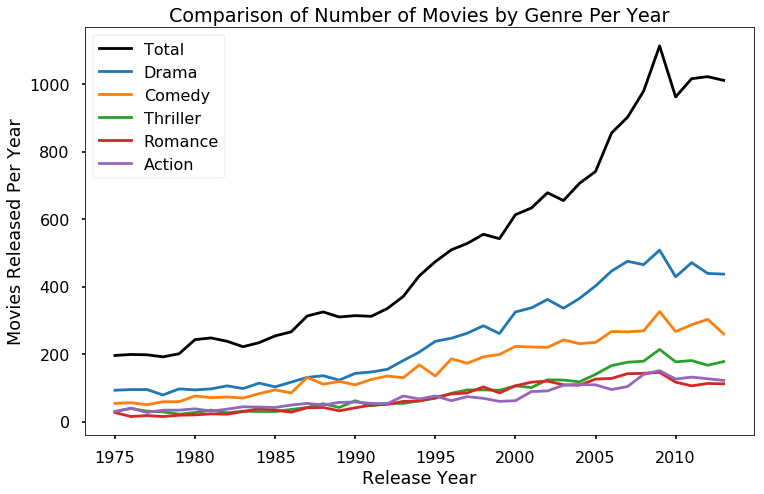

In [17]:
plt.figure(figsize=(12, 7.5))
# print(plt.style.available)
plt.style.use('seaborn-poster')

# Leave the first row uncommented if you want to display the total
plt.plot(total_films['year'], total_films['title'], label='Total', color='black')
plt.plot(by_year['year'], by_year['Drama'], label='Drama')
plt.plot(by_year['year'], by_year['Comedy'], label='Comedy')
plt.plot(by_year['year'], by_year['Thriller'], label='Thriller')
plt.plot(by_year['year'], by_year['Romance'], label='Romance')
plt.plot(by_year['year'], by_year['Action'], label='Action')


plt.xlabel('Release Year')
plt.ylabel('Movies Released Per Year')
plt.title("Comparison of Number of Movies by Genre Per Year")
plt.legend()

plt.show()

### Similar chart with Total on the secondary axis

This is about the same thing yet trying to plot the total on the right to smooth out the graph.

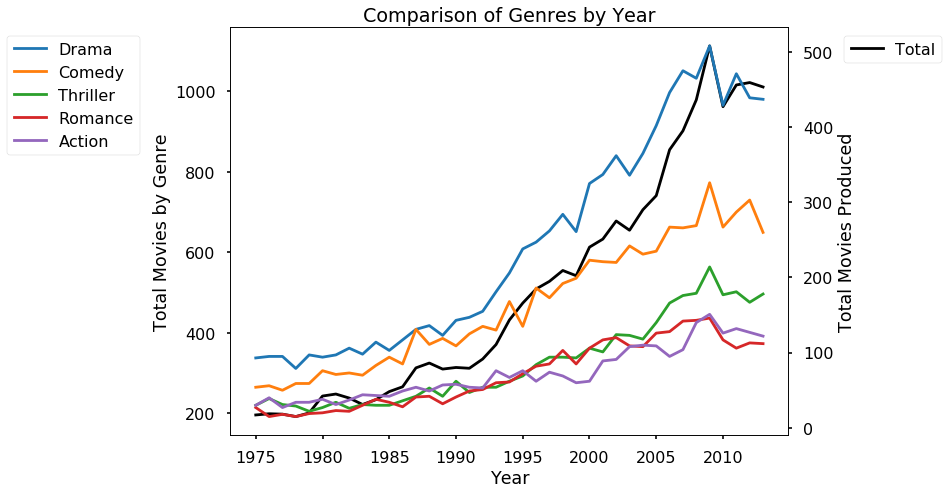

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 7.5))

ax1.plot(total_films['year'], total_films['title'], label='Total', color='black')

ax2 = ax1.twinx() 

ax2.plot(by_year['year'], by_year['Drama'], label='Drama')
ax2.plot(by_year['year'], by_year['Comedy'], label='Comedy')
ax2.plot(by_year['year'], by_year['Thriller'], label='Thriller')
ax2.plot(by_year['year'], by_year['Romance'], label='Romance')
ax2.plot(by_year['year'], by_year['Action'], label='Action')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Movies by Genre')
ax2.set_ylabel('Total Movies Produced')
ax1.set_title("Comparison of Genres by Year")

ax1.legend(bbox_to_anchor=(1.1, .98), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(-0.4, 0.98), loc=2, borderaxespad=0.)
#plt.tight_layout()
plt.show()

## Fun with Correlation

There isn't any logical correlation here, however data strongly suggests that certain Genres are more directly coorelated to each other.  Most likely this is from the double tagging of movies.

*Also - this is an opportunity to try the heatmap from seaborn*

https://seaborn.pydata.org/examples/index.html

In [19]:
by_year1 = by_year.drop(columns=[("movieId")])
by_year2 = by_year1.drop(columns=[("year")])
by_year1.corr()
by_year2.corr()

,Drama,Comedy,Thriller,Romance,Action
Drama,1.000000,0.977424,0.986642,0.972053,0.947514
Comedy,0.977424,1.000000,0.964231,0.962835,0.939821
Thriller,0.986642,0.964231,1.000000,0.939415,0.952291
Romance,0.972053,0.962835,0.939415,1.000000,0.902715
Action,0.947514,0.939821,0.952291,0.902715,1.000000


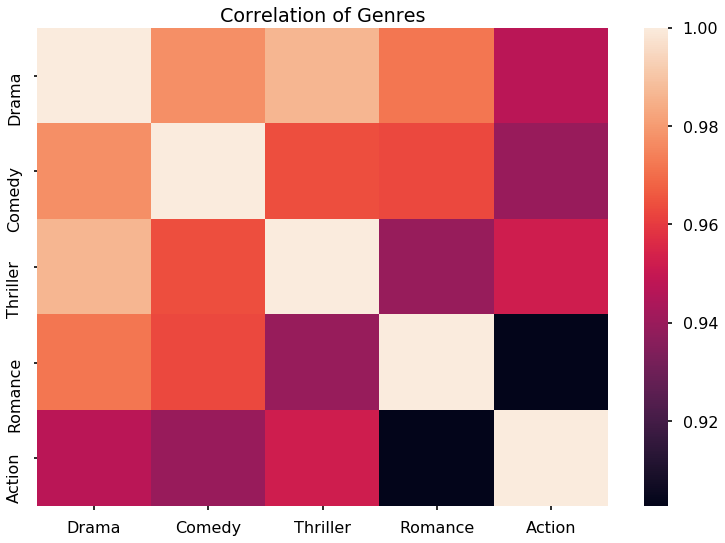

In [20]:
data = by_year2.corr()

ax = plt.axes()
sns.heatmap(data, ax = ax)

ax.set_title('Correlation of Genres')
plt.show()

## Are Different Years Happier?

One though I had while seeing such a high number of comedy movies, is to see if there are different years that had higher rated comedies movies correlating to potentially "happier" people? :) 

* The first thing we'll do is create a table of the movies that we'll join with the ratings
* Then we'll create a filter that will remove any films that are not comedy

In [21]:
comedy_movies = movies.drop(columns=(['genres', 'Drama', 'Thriller', 'Romance', 'Action']))
comedy_movies.head()

,movieId,title,year,Comedy
0,1,Toy Story (1995),1995.0,True
1,2,Jumanji (1995),1995.0,False
2,3,Grumpier Old Men (1995),1995.0,True
3,4,Waiting to Exhale (1995),1995.0,True
4,5,Father of the Bride Part II (1995),1995.0,True


In [22]:
filter = comedy_movies['Comedy'] == True
comedy_movies = comedy_movies[filter]
comedy_movies.head()

,movieId,title,year,Comedy
0,1,Toy Story (1995),1995.0,True
2,3,Grumpier Old Men (1995),1995.0,True
3,4,Waiting to Exhale (1995),1995.0,True
4,5,Father of the Bride Part II (1995),1995.0,True
6,7,Sabrina (1995),1995.0,True


#### Quickly let's look at how many comedies were products per year

In [23]:
comedies_per_year = comedy_movies.groupby("year",as_index=False).count()
comedies_per_year = comedies_per_year[-41:-2]
comedies_per_year.tail()

,year,movieId,title,Comedy
99,2009.0,326,326,326
100,2010.0,267,267,267
101,2011.0,287,287,287
102,2012.0,303,303,303
103,2013.0,260,260,260


### Bring in the Ratings Database

Next, create a table of the average ratings

*Let's start by checking out the ratings distribution*

In [24]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

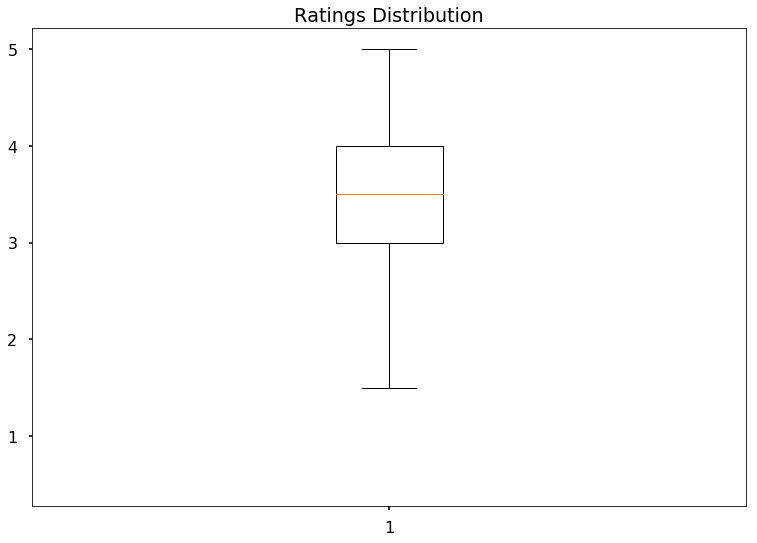

In [25]:
plt.figure()
plt.boxplot(ratings['rating'])

plt.title('Ratings Distribution')

plt.show()

### Get the Average Ratings by Movie-ID

In [26]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


### Join the Tables

comedy_movies & average_rating

In [27]:
joined = comedy_movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,year,Comedy,rating
0,1,Toy Story (1995),1995.0,True,3.921240
1,3,Grumpier Old Men (1995),1995.0,True,3.151040
2,4,Waiting to Exhale (1995),1995.0,True,2.861393
3,5,Father of the Bride Part II (1995),1995.0,True,3.064592
4,7,Sabrina (1995),1995.0,True,3.366484


In [28]:
comedy_average = joined[['year','rating']].groupby('year', as_index=False).mean()
comedy_average = comedy_average[-41:-2]
comedy_average.head()

,year,rating
65,1975.0,3.276389
66,1976.0,3.162949
67,1977.0,3.297120
68,1978.0,3.180300
69,1979.0,3.094226


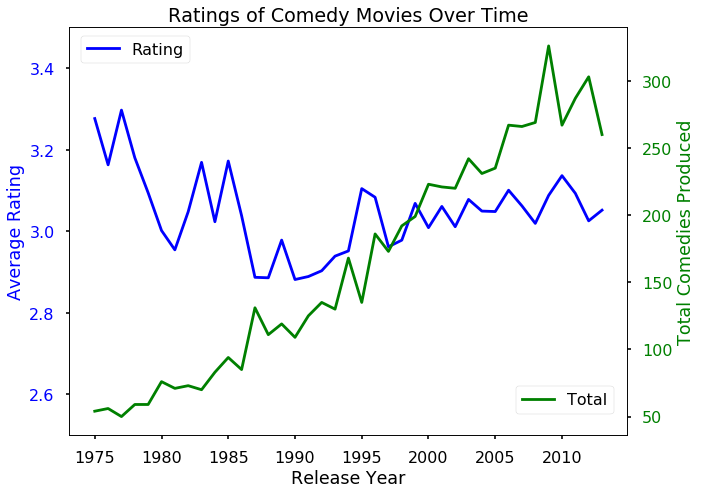

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 7.5))

# Plot the first axis as the ratings
ax1.plot(comedy_average['year'], comedy_average['rating'], label='Rating', color='blue')


# Create the second axis
ax2 = ax1.twinx() 

# Plot the second axis as the number produced per year
ax2.plot(comedies_per_year['year'], comedies_per_year['Comedy'], label='Total', color='green')

# Setup up all of the lables, colors, and other details per axis
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average Rating', color="blue")
ax1.set_title("Ratings of Comedy Movies Over Time")
ax1.tick_params(axis='y', labelcolor='blue')


ax2.set_ylabel('Total Comedies Produced', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(0.8, 0.12), loc=2, borderaxespad=0.)

ax1.set_ylim((2.5,3.5))

plt.show()



### Next Let's Find Out the Highest Rating Movies Per Year

* This will be used to later decorate our presentation with some coverart

In [30]:
count_ratings = ratings[['movieId','rating']].groupby('movieId', as_index=False).count()
count_ratings.head()

,movieId,rating
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


In [31]:
count_joined = comedy_movies.merge(count_ratings, on='movieId', how='inner')
count_joined.to_csv('top.csv')

## What are the Best Films of the Late 70's?

Iterate through the dataframe for the last four years of the 70's and get the top movies

In [32]:
# movies.loc[movies['movieId'] == 1234]

for i in range(1975,1986):
    max_rating_per_year = count_joined.loc[count_joined['year'] == i].rating.max()
    top_rated_film = count_joined.loc[count_joined['rating'] == max_rating_per_year]
    print(top_rated_film)



     movieId                                   title    year  Comedy  rating
381     1136  Monty Python and the Holy Grail (1975)  1975.0    True   33024
      movieId           title    year  Comedy  rating
1167     3504  Network (1976)  1976.0    True    5206
     movieId              title    year  Comedy  rating
404     1230  Annie Hall (1977)  1977.0    True   15383
     movieId          title    year  Comedy  rating
443     1380  Grease (1978)  1978.0    True   15630
     movieId                                title    year  Comedy  rating
368     1080  Monty Python's Life of Brian (1979)  1979.0    True   20557
     movieId                       title    year  Comedy  rating
402     1220  Blues Brothers, The (1980)  1980.0    True   19824
     movieId                title    year  Comedy  rating
990     2968  Time Bandits (1981)  1981.0    True    8595
      movieId           title    year  Comedy  rating
1476     4361  Tootsie (1982)  1982.0    True    8015
     movieId        